In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import sklearn

In [16]:
new_store = pd.read_hdf("singlepi_e100GeV_pu200Nov7.h5")
prev_store = pd.read_hdf("singlepi_e100GeV_pu200_oct27.h5")

In [17]:
new_store.head()

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,trckType
0,1.0,0.0,-1.0,1.0,0.077115,1.963233,0.158004,91.118462,14.518062,322.102753,5.0,57.759506,1.897144,0.196742,211.0
1,1.0,0.0,-1.0,1.0,0.134952,1.931620,0.233432,92.770134,22.057596,322.102753,7.0,57.759506,1.897144,0.196742,211.0
2,1.0,0.0,-1.0,1.0,0.081363,1.932140,0.148012,94.262695,14.054753,322.102753,2.0,57.759506,1.897144,0.196742,211.0
3,1.0,0.0,-1.0,1.0,0.023200,1.950308,0.361422,87.475647,33.068218,322.102753,2.0,57.759506,1.897144,0.196742,211.0
4,1.0,0.0,-1.0,1.0,0.088878,1.911650,0.356526,91.242096,33.982418,322.102753,2.0,57.759506,1.897144,0.196742,211.0


In [73]:
new_store.describe()

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,trckType
count,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.000000,25881.0
mean,50.795564,0.180441,-0.223678,13.295661,0.384665,1.946960,0.004300,95.863053,0.068250,343.017496,4.120127,77.033105,1.905618,0.016360,211.0
std,30.673379,0.552196,1.265127,9.819148,1.313002,0.133162,0.319084,15.287408,31.847045,24.491083,4.256078,31.988043,0.035455,0.306203,0.0
min,1.000000,0.000000,-1.000000,1.000000,0.011868,1.505632,-0.730329,48.490150,-77.655998,322.102722,1.000000,0.407331,1.657507,-0.500114,211.0
25%,22.000000,0.000000,-1.000000,6.000000,0.042996,1.862466,-0.262214,85.466316,-25.414072,328.987274,2.000000,61.029854,1.882552,-0.225940,211.0
50%,51.000000,0.000000,-1.000000,10.000000,0.083943,1.919276,-0.038539,95.772484,-3.790169,334.927277,3.000000,75.802330,1.900593,-0.059937,211.0
75%,78.000000,0.000000,1.000000,18.000000,0.198507,2.020672,0.256231,105.439545,25.085609,346.807251,4.000000,95.444336,1.929873,0.295092,211.0
max,100.000000,6.000000,2.000000,50.000000,43.521908,2.648121,0.935652,181.296371,106.158821,512.949463,55.000000,151.615540,1.987516,0.629487,211.0


In [74]:
len(new_store)

25881

In [76]:
corr1= new_store.drop(['trckType'],1,inplace=False).corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi
event,1,0.15,0.019,0.014,0.012,0.074,0.29,-0.16,0.28,0.017,0.011,-0.12,0.078,0.32
trackster,0.15,1,0.073,-0.094,0.0068,-0.071,-0.03,-0.026,-0.03,-0.08,0.044,-0.54,-0.13,-0.042
purity,0.019,0.073,1,0.58,0.34,-0.29,0.014,0.47,0.017,0.53,0.35,-0.19,-0.18,-0.017
layer,0.014,-0.094,0.58,1,0.29,-0.0054,0.036,0.43,0.037,0.92,0.15,0.032,-0.047,0.032
E,0.012,0.0068,0.34,0.29,1,-0.089,0.025,0.19,0.03,0.27,0.69,-0.021,-0.064,0.017
eta,0.074,-0.071,-0.29,-0.0054,-0.089,1,0.052,-0.81,0.046,-0.045,-0.07,0.36,0.53,0.12
phi,0.29,-0.03,0.014,0.036,0.025,0.052,1,-0.15,0.99,0.016,0.017,0.06,0.16,0.93
x,-0.16,-0.026,0.47,0.43,0.19,-0.81,-0.15,1,-0.14,0.5,0.11,-0.23,-0.43,-0.2
y,0.28,-0.03,0.017,0.037,0.03,0.046,0.99,-0.14,1,0.015,0.021,0.057,0.15,0.93
z,0.017,-0.08,0.53,0.92,0.27,-0.045,0.016,0.5,0.015,1,0.12,0.017,-0.081,0.0088


In [4]:
# load the old data of october 27 to use it as test data. 
prev_store['purity']=prev_store['purity'].apply(lambda x: 0 if x <=1 else 1 )
XOct27Test = prev_store.drop(['purity','event','trackster','trckType'],1,inplace=False)
YOct27Test = prev_store[['purity']].iloc[:,0]

In [5]:
df = new_store.drop(['trckType'],1,inplace=False)
df['purity']=df['purity'].apply(lambda x: 0 if x <=1 else 1 )


In [37]:
trainDF=df.sample(frac=0.9,random_state=200) #random state is a seed value
testDF=df.drop(trainDF.index)

x0Train = trainDF.drop(['purity','event','trackster'],1,inplace=False)
x0Test = testDF.drop(['purity','event','trackster'],1,inplace=False)

y0Train = trainDF[['purity']].iloc[:,0]
y0Test =  testDF[['purity']].iloc[:,0]

clf0 = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234).fit(x0Train, y0Train)
y0TestPred = clf0.predict(x0Test) 

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, y0TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(y0Test, y0TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(y0Test, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, y0TestPred))

Testing confusion_matrix
[[1953   77]
 [  98  460]]
Test accuracy
0.9323802163833076
Test Percision
0.8566108007448789
Test recall
0.8243727598566308
Test F1 score
0.8401826484018265


In [25]:
threshold = 0.45
yTestPredProba = clf0.predict_proba(XOct27Test)
yTest0predicted = (yTestPredProba [:,1] >= threshold).astype('int')

print("Testing confusion_matrix")
print(confusion_matrix(YOct27Test, yTest0predicted))
print("Test accuracy")
print(sklearn.metrics.accuracy_score(YOct27Test, yTest0predicted))
print("Test Percision")
print(sklearn.metrics.precision_score(YOct27Test, yTest0predicted))
print("Test recall")
print(sklearn.metrics.recall_score(YOct27Test, yTest0predicted))
print("Test F1 score")
print(sklearn.metrics.f1_score(YOct27Test, yTest0predicted))

Testing confusion_matrix
[[25701   262]
 [  388  5923]]
Test accuracy
0.9798599491851026
Test Percision
0.9576394502829426
Test recall
0.9385200443669783
Test F1 score
0.9479833546734955


In [47]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x0Train.columns, clf0.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',inplace= True, ascending = False)
importances

,Gini-importance
z,0.172753
E,0.153596
eta,0.147974
layer,0.146229
x,0.118771
nHits,0.059472
y,0.052373
phi,0.046735
trckEn,0.038871
trckEta,0.033857


In [24]:
threshold = 0.45
yTestPredProba = clf0.predict_proba(x0Test)
yTest0predicted = (yTestPredProba [:,1] >= threshold).astype('int')

print("Testing confusion_matrix")
print(confusion_matrix(y0Test, yTest0predicted))
print("Test accuracy")
print(sklearn.metrics.accuracy_score(y0Test, yTest0predicted))
print("Test Percision")
print(sklearn.metrics.precision_score(y0Test, yTest0predicted))
print("Test recall")
print(sklearn.metrics.recall_score(y0Test, yTest0predicted))
print("Test F1 score")
print(sklearn.metrics.f1_score(y0Test, yTest0predicted))

Testing confusion_matrix
[[3861  175]
 [ 164  976]]
Test accuracy
0.9345054095826894
Test Percision
0.8479582971329279
Test recall
0.856140350877193
Test F1 score
0.8520296813618508


In [6]:
updated_df_groupby_avg=df.groupby(['event','trackster','layer']).mean().reset_index()
updated_df_groupby_max=df.groupby(['event','trackster','layer']).max().reset_index()
updated_df_groupby_min=df.groupby(['event','trackster','layer']).min().reset_index()
updated_df_groupby_sum=df.groupby(['event','trackster','layer']).sum().reset_index()

In [8]:
def getValueEventLayerTrackster(df, col, event, trackster,layer, defaultV = 0):
    s = df.loc[(df['event'] == event) & (df['layer'] ==layer) & (df['trackster'] ==trackster) ,col ]
    return defaultV if s.size == 0 else s.values[0]

In [33]:
#test
getValueEventLayerTrackster(updated_df_groupby_sum, 'E', 1,0,8,8)

3.834830043837428

In [9]:
updated_df = df.copy()
#updated_df['prevAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] - 1, row['trckEta']), axis=1)
#updated_df['prevAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] - 1,row['trckPhi']), axis=1)
#updated_df['prevAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)
#updated_df['PrevSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)

#updated_df['NextAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] + 1,row['trckEta']), axis=1)
#updated_df['NextAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] + 1,row['trckPhi']), axis=1)
#updated_df['NextAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)
#updated_df['NextSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)

#updated_df['SiblingAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'],row['trckEta'] ), axis=1)
#updated_df['SiblingAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'],row['trckPhi'] ), axis=1)
#updated_df['SiblingAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)
#updated_df['SiblingSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)

updated_df['RatioSiblingNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] ), axis=1)
updated_df['RatioNextNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] + 1, 1 ), axis=1)
updated_df['RatioPrevNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] - 1, 1 ), axis=1)

updated_df['RatioE'] = updated_df.apply(lambda row: row['E'] / row['trckEn'], axis=1)
updated_df['RatioSiblingE'] = updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer']), axis=1)


updated_df['RatioNextE'] = updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 1,row['trckEn']), axis=1)

updated_df['RatioPrevE'] =  updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 1, row['trckEn']), axis=1)

updated_df.head()

,event,trackster,purity,layer,E,eta,phi,x,y,z,...,trckEn,trckEta,trckPhi,RatioSiblingNHits,RatioNextNHits,RatioPrevNHits,RatioE,RatioSiblingE,RatioNextE,RatioPrevE
0,1.0,0.0,0,1.0,0.077115,1.963233,0.158004,91.118462,14.518062,322.102753,...,57.759506,1.897144,0.196742,0.178571,0.128205,5.0,0.001335,0.133108,0.049770,0.001335
1,1.0,0.0,0,1.0,0.134952,1.931620,0.233432,92.770134,22.057596,322.102753,...,57.759506,1.897144,0.196742,0.250000,0.179487,7.0,0.002336,0.232939,0.087097,0.002336
2,1.0,0.0,0,1.0,0.081363,1.932140,0.148012,94.262695,14.054753,322.102753,...,57.759506,1.897144,0.196742,0.071429,0.051282,2.0,0.001409,0.140440,0.052511,0.001409
3,1.0,0.0,0,1.0,0.023200,1.950308,0.361422,87.475647,33.068218,322.102753,...,57.759506,1.897144,0.196742,0.071429,0.051282,2.0,0.000402,0.040045,0.014973,0.000402
4,1.0,0.0,0,1.0,0.088878,1.911650,0.356526,91.242096,33.982418,322.102753,...,57.759506,1.897144,0.196742,0.071429,0.051282,2.0,0.001539,0.153412,0.057362,0.001539


In [19]:
corr1= updated_df.corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,RatioSiblingNHits,RatioNextNHits,RatioPrevNHits,RatioE,RatioSiblingE,RatioNextE,RatioPrevE
event,1,0.15,0.027,0.014,0.012,0.074,0.29,-0.16,0.28,0.017,0.011,-0.12,0.078,0.32,0.011,-0.0038,-0.0021,0.0097,0.0096,0.00084,-0.0036
trackster,0.15,1,0.054,-0.094,0.0068,-0.071,-0.03,-0.026,-0.03,-0.08,0.044,-0.54,-0.13,-0.042,0.2,0.2,0.13,0.32,0.18,0.078,0.11
purity,0.027,0.054,1,0.58,0.37,-0.26,0.023,0.45,0.028,0.54,0.37,-0.16,-0.15,-0.0028,0.49,0.26,0.11,0.24,0.5,0.15,0.16
layer,0.014,-0.094,0.58,1,0.29,-0.0054,0.036,0.43,0.037,0.92,0.15,0.032,-0.047,0.032,0.47,0.23,-0.0015,0.055,0.41,0.11,0.1
E,0.012,0.0068,0.37,0.29,1,-0.089,0.025,0.19,0.03,0.27,0.69,-0.021,-0.064,0.017,0.49,0.21,0.17,0.38,0.57,0.2,0.27
eta,0.074,-0.071,-0.26,-0.0054,-0.089,1,0.052,-0.81,0.046,-0.045,-0.07,0.36,0.53,0.12,-0.15,-0.072,-0.055,-0.078,-0.15,-0.042,-0.049
phi,0.29,-0.03,0.023,0.036,0.025,0.052,1,-0.15,0.99,0.016,0.017,0.06,0.16,0.93,0.025,0.0034,0.0068,-0.016,0.024,-0.0021,0.0057
x,-0.16,-0.026,0.45,0.43,0.19,-0.81,-0.15,1,-0.14,0.5,0.11,-0.23,-0.43,-0.2,0.34,0.17,0.065,0.08,0.31,0.087,0.08
y,0.28,-0.03,0.028,0.037,0.03,0.046,0.99,-0.14,1,0.015,0.021,0.057,0.15,0.93,0.032,0.0074,0.0089,-0.014,0.03,-0.00073,0.0076
z,0.017,-0.08,0.54,0.92,0.27,-0.045,0.016,0.5,0.015,1,0.12,0.017,-0.081,0.0088,0.48,0.24,0.049,0.05,0.42,0.12,0.097


In [78]:
trainDF=updated_df.sample(frac=0.9,random_state=200) #random state is a seed value
testDF=updated_df.drop(trainDF.index)

xTrain = trainDF.drop(['purity','event','trackster'],1,inplace=False)
xTest = testDF.drop(['purity','event','trackster'],1,inplace=False)

yTrain = trainDF[['purity']].iloc[:,0]
yTest =  testDF[['purity']].iloc[:,0]

clf = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234).fit(xTrain, yTrain)
yTestPred = clf.predict(xTest) 

print("Testing confusion_matrix")
print(confusion_matrix(yTest, yTestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, yTestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, yTestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, yTestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, yTestPred))

Testing confusion_matrix
[[1946   84]
 [ 114  444]]
Test accuracy
0.9234930448222566
Test Percision
0.8409090909090909
Test recall
0.7956989247311828
Test F1 score
0.8176795580110496


In [79]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(xTrain.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',inplace= True, ascending = False)
importances

,Gini-importance
z,0.141338
eta,0.120672
layer,0.116783
E,0.098716
x,0.078531
RatioE,0.057185
RatioNextNHits,0.056960
RatioSiblingNHits,0.056956
RatioNextE,0.041289
RatioSiblingE,0.035231


In [81]:
# use the MAX instead of the sum to calc ratio.
updated_df2 = df.copy()

#updated_df['prevAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] - 1, row['trckEta']), axis=1)
#updated_df['prevAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] - 1,row['trckPhi']), axis=1)
#updated_df['prevAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)
#updated_df['PrevSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)

#updated_df['NextAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] + 1,row['trckEta']), axis=1)
#updated_df['NextAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] + 1,row['trckPhi']), axis=1)
#updated_df['NextAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)
#updated_df['NextSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)

#updated_df['SiblingAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'],row['trckEta'] ), axis=1)
#updated_df['SiblingAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'],row['trckPhi'] ), axis=1)
#updated_df['SiblingAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)
#updated_df['SiblingSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)

updated_df2['RatioSiblingNHits'] = updated_df2.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] ), axis=1)
updated_df2['RatioNextNHits'] = updated_df2.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] + 1, 1 ), axis=1)
updated_df2['RatioPrevNHits'] = updated_df2.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_max, 'nHits', row['event'], row['trackster'], row['layer'] - 1, 1 ), axis=1)

updated_df2['RatioE'] = updated_df2.apply(lambda row: row['E'] / row['trckEn'], axis=1)
updated_df2['RatioSiblingE'] = updated_df2.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_max, 'E', row['event'], row['trackster'], row['layer']), axis=1)


updated_df2['RatioNextE'] = updated_df2.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_max, 'E', row['event'], row['trackster'], row['layer'] + 1,row['trckEn']), axis=1)

updated_df2['RatioPrevE'] =  updated_df2.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_max, 'E', row['event'], row['trackster'], row['layer'] - 1, row['trckEn']), axis=1)

trainDF=updated_df2.sample(frac=0.9,random_state=200) #random state is a seed value
testDF=updated_df2.drop(trainDF.index)

xTrain = trainDF.drop(['purity','event','trackster'],1,inplace=False)
xTest = testDF.drop(['purity','event','trackster'],1,inplace=False)

yTrain = trainDF[['purity']].iloc[:,0]
yTest =  testDF[['purity']].iloc[:,0]

clf = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234).fit(xTrain, yTrain)
yTestPred = clf.predict(xTest) 

print("Testing confusion_matrix")
print(confusion_matrix(yTest, yTestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, yTestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, yTestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, yTestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, yTestPred))

Testing confusion_matrix
[[1944   86]
 [ 114  444]]
Test accuracy
0.9227202472952086
Test Percision
0.8377358490566038
Test recall
0.7956989247311828
Test F1 score
0.8161764705882353


In [82]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(xTrain.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',inplace= True, ascending = False)
importances

,Gini-importance
z,0.157656
layer,0.125069
eta,0.123136
E,0.103016
x,0.089004
RatioE,0.083578
RatioSiblingNHits,0.035164
RatioSiblingE,0.034999
nHits,0.033227
y,0.029845


In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
rfc = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234)
# The "accuracy" scoring is proportional to the number of correct
# classifications
X = updated_df.drop(['purity','event','trackster'],1,inplace=False)
Y = updated_df[['purity']].iloc[:,0]


Optimal number of features : 7


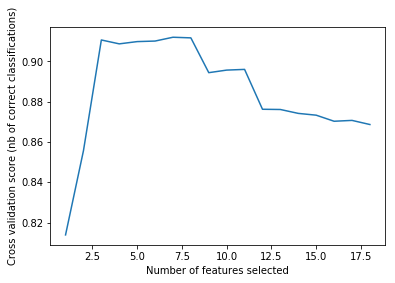

In [86]:
#use Accuracy

rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')

rfecv.fit(X, Y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [93]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, ranking in zip(X.columns, rfecv.ranking_):
    feats[feature] = ranking 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'RFECV Ranking'})
importances.sort_values(by='RFECV Ranking',inplace= True, ascending = True)
importances

,RFECV Ranking
layer,1
E,1
eta,1
x,1
z,1
RatioE,1
RatioNextNHits,1
RatioSiblingNHits,2
RatioSiblingE,3
RatioNextE,4


In [42]:
#featuer selection using CHi-squard
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature extraction
X = updated_df.drop(['purity','event','trackster'],1,inplace=False)
Y = updated_df[['purity']].iloc[:,0]
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X, Y)


print(fit.scores_)

[1.32409541e+04 4.06984911e+03 1.85429627e+03 1.40076952e+01
 6.53116727e+03 1.96168118e+01 1.06789226e+04 4.13084957e+03
 6.83345507e+02 6.35740739e+02 2.07232927e-01 8.06970726e+03
 1.82984592e+03 3.27419565e+02 1.56740203e+03 8.43510859e+03
 5.61502545e+02 6.85762133e+02]


In [45]:
feats = {} 
for feature, ranking in zip(X.columns, fit.scores_):
    feats[feature] = ranking 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'f_classif Ranking'})
importances.sort_values(by='f_classif Ranking',inplace= True, ascending = False)
importances

,f_classif Ranking
layer,13240.954088
z,10678.922643
RatioSiblingE,8435.108586
RatioSiblingNHits,8069.707259
x,6531.167268
nHits,4130.849568
E,4069.849107
eta,1854.296267
RatioNextNHits,1829.845915
RatioE,1567.402034
